,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


None

Missing Values:
 User ID              0
Username             0
Tweet                0
Retweet Count        0
Mention Count        0
Follower Count       0
Verified             0
Bot Label            0
Location             0
Created At           0
Hashtags          8341
dtype: int64


<ipython-input-1-ab23ec71f42d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bot Label', data=df, palette='coolwarm')


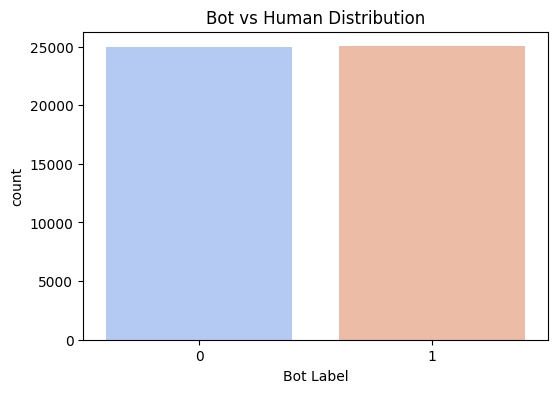

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51      4968
           1       0.51      0.49      0.50      5032

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

Confusion Matrix:
 [[2617 2351]
 [2583 2449]]
AUC-ROC Score: 0.505450483251794


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:25:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.47      4968
           1       0.50      0.55      0.52      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [1]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost transformers

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from transformers import pipeline

# Load dataset
file_path = '/content/bot_detection_data.csv'  # Update with your file path

# Read dataset
df = pd.read_csv(file_path)

# Display basic info
display(df.head())
display(df.info())

# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.countplot(x='Bot Label', data=df, palette='coolwarm')
plt.title('Bot vs Human Distribution')
plt.show()

# Feature Engineering
## Text Features (TF-IDF)
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df['Tweet'].fillna('')).toarray()

## Behavioral Features
X_behavior = df[['Retweet Count', 'Mention Count', 'Follower Count']].fillna(0)
scaler = StandardScaler()
X_behavior = scaler.fit_transform(X_behavior)

# Combine Features
X = np.hstack((X_text, X_behavior))
y = df['Bot Label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

# Alternative Model: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
